# Feature-based registration - Rotation, translation, and scale

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from imp import reload

import sys
sys.path.append(os.path.join('..', '..'))
from toolbox import transform
reload(transform)

<module 'toolbox.transform' from '/Users/williammarstrand/privat/DTU/Kandidat/1. Semester/Advanced Image Analysis/02506-advanced-image-analysis/exercises/week4/../../toolbox/transform.py'>

In [8]:
n = 1000
P = np.random.rand(2,n)
P

array([[0.19156981, 0.53098185, 0.1365935 , ..., 0.05577577, 0.74143327,
        0.3404609 ],
       [0.24595392, 0.04895336, 0.56041805, ..., 0.79466493, 0.17664701,
        0.23312695]])

In [9]:
s = 5
theta = 45
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
t = np.array([[5, 2]]).T

In [10]:
Q = transform.apply_transformation(P,s,R,t)
Q

array([[4.45676387, 6.18640928, 2.97446938, ..., 1.76558524, 6.19590816,
        4.90241527],
       [3.46106212, 4.38765299, 4.05313905, ..., 4.3245738 , 5.61842372,
        4.06083046]])

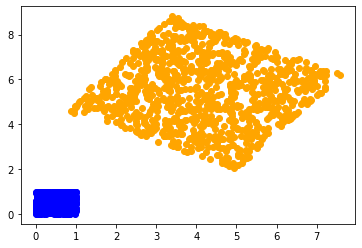

In [11]:
plt.scatter(P[0,:], P[1,:], c='blue')
plt.scatter(Q[0,:], Q[1,:], c='orange')
plt.show()

In [16]:
_s, _R, _t = transform.get_transformation(P, Q)

In [17]:
print(f's total dif: {s-_s}')
print(f'R total dif: {sum(sum(R-_R))}')
print(f't total dif: {sum(sum(t-_t))}')

s total dif: 0.0
R total dif: 4.440892098500626e-16
t total dif: -8.881784197001252e-16


In [18]:
_Q = transform.apply_transformation(P,_s,_R,_t)

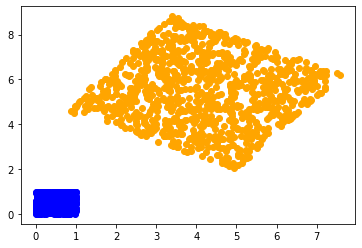

In [19]:
plt.scatter(P[0,:], P[1,:], c='blue')
plt.scatter(_Q[0,:], _Q[1,:], c='orange')
plt.show()

### Adding Noise

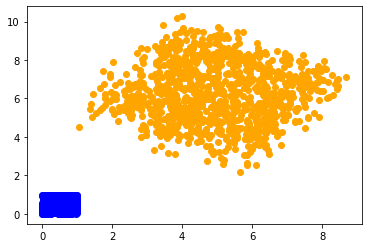

In [25]:
noise = np.random.rand(Q.shape[0], Q.shape[1])*1.5
noisy_Q = Q + noise
noisy_s, noisy_R, noisy_t = transform.get_transformation(P, noisy_Q)
plt.scatter(P[0,:], P[1,:], c='blue')
plt.scatter(noisy_Q[0,:], noisy_Q[1,:], c='orange')
plt.show()